# IBM/Coursera - Capstone Project - The Battle of Neighborhoods

### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Find the right place to expand a bussiness in a new city is a very difficult decidion that involves a lots of a analisys. One of those are the analisys of local infrastructure that will recive it. Similar places can help a better adpatation to the team, to the bussiness model and so on.

But how find a similar place to set a bussiness? How similiar they are?

To deal with this problem Artificial Inteligence (AI) can help providing algorithms to find the optimal or approximated values  in case of heristics like Kmeans clustering. Kmeans is a cluster algorithm that find similarity and dissimilarity in a dataset and seperate them into a clusters.

A cluster is a group of similar intra objects and dissimilar inter objects of another cluster. 

A businness place is setted into a neighborhood and a lots of neighborhoods forms a city. Neighborhoods can be, similar and dissimilar each other. So Kmeans can find this patterns and separete them into a clusters. Follow this logic a neiborhood in one cluster is very similiar to another neighborhood in same cluster, so in terms of infraestructure if a business headquarter is located into a neighborhood cluster the new place should setted in another place in the same cluster because they are very similiar.

A Brazilian Car Dealership want's to expand their Business. It is located in Belém city and pretends to expand in Itapetininga city, Those cities should be very differents because they are located in a different States, but Kmeans will be performed to find how Belém neighborhoods are similar to Itapetininga neighborhoods and what neighborhoods are better to set a car dealership subsidiary.

The higher Itapetininga House Broker offers 12 possibillites of locations there are for rent and this project aims to find the bests lots possibilities to be choosed by neighborhood location and similarity. This analisys will only focused in a spatial location. Another analysis should be performed to choose the best one.


## Data <a name="data"></a>

The data that will be used is:

[**Lot's coordenates:**](#lots)
* A dataframe with lots geo coordenates

[**Neighborhoods names:**](#names) 

* The list of neighborhoods in Belém city neighborhoods on Belém Town Hall web site.
* The list of neighborhoods in Itapetininga on correios web site (Brasilian State-owned postal services). 

[**Neighborhoods coordenates:**](#coordenates)
* The neighborhood names will be performed into **Google Geolocate API** to find the **geolocality coordenates** of neighborhoods.

[**Venues types and coordenates in 500 meters radius**:](#venues)

* **Foursquare API** will provide **all venues** in radius of **500 meters** from each neighborhood.

The Belém and Itapetining will be performed **together** to **Kmeans** find the clusters and the right place to be choosed will be the Itapetininga neighborhoods located in the same cluster of dealership headquartes located in Umarizal neighborhood in Belem City.

### Libraries used

First will be imported all the necessarie libraries:

In [165]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import folium
from folium import plugins
from folium.plugins import HeatMap
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from geopy.geocoders import Nominatim
from math import sqrt
from unidecode import unidecode
from yellowbrick.cluster import KElbowVisualizer
import re
import shutil#For study. Final version not necessary
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import math
from IPython.display import Image

### Lot's Coordenates<a name="lots"></a>

The avaiable lots in Itapetininga need to be located in the map too. So the Itapetininga house broker send a table with the lots locations. The table can finded in GitHub as below:

In [221]:
#Downloaded from GitHub
url = 'https://raw.githubusercontent.com/eduardozanutti/Coursera_Capstone/main/lots.csv'
lot_location = pd.read_csv(url)
lot_location

,Lotnames,Latitude,Longitude,price,area
0,lot 1,-23.590749,-48.058831,25000,1300
1,lot 2,-23.599671,-48.062151,12000,1622
2,lot 3,-23.602888,-48.062234,6500,1200
3,lot 4,-23.606397,-48.061880,25000,1500
4,lot 5,-23.602110,-48.061569,5500,1524
5,lot 6,-23.584074,-48.041323,6000,364
6,lot 7,-23.585158,-48.035727,7000,388
7,lot 8,-23.586283,-48.034049,15000,1024
8,lot 9,-23.582544,-48.035506,5000,425
9,lot 10,-23.578440,-48.026988,8000,900


As mensioned before there are 12 possibilities of set a dealership location in Itapetininga City and for find the best lot's will be necessary Belem and itapetininga neighborhoods names and coordenades data.

###  Neighborhood Names<a name="names"></a> 

#### Belem city

The list of Belem neighborhood names can be easly find on the Belem City Town-hall web-site. So will be perfomed a web-scraping with BeautifulSoup to get all of it.

In [3]:
#Neighborhoods web-scraping with BS4:
url_bel='http://www.belem.pa.gov.br/segep/download/mapas/bairros/bairros_index.htm'
req=requests.get(url_bel)
soup=BeautifulSoup(req.content, 'lxml')
table = soup.find_all(name='table')
#Transform html table in DataFrame
df_table=pd.read_html(str(table))[0]

First look in a dataframe scraped from www.belem.pa.gov.br

In [4]:
df_table

,0,1,2,3
0,Aeroporto,Caruara,Maracajá,Pratinha
1,Água Boa,Castanheira,Maracangalha,Reduto
2,Águas Lindas,Chapéu-Virado,Marahú,Sacramenta
3,Águas Negras,Cidade Velha,Marambaia,São Brás
4,Agulha,Condor,Marco,São Clemente
5,Ariramba,Coqueiro,Miramar,São Francisco
6,Aurá,Cremação,Montese (Terra Firme),São João de Outeiro
7,Baia do Sol,Cruzeiro,Murubira,Souza
8,Barreiro,Curió-Utinga,Natal do Murubira,Sucurijuquara
9,Batista Campos,Farol,Nazaré,Tapanã


This dataframe should be in the same line to be perfomed in **Google Api**. So a list with all names is created and after that transformed into a **single column DataFrame.**

In [6]:
#Transform a DataFrame ina a single list and a single list to a single dataframe
list_neig=[]
for n in range(0,4):
    for neighbor in df_table[n]:
        #Regular expression to find the word within parentehsis and remove it
        list_neig.append(re.sub("[\(\[].*?[\)\]]","",unidecode(str(neighbor)).lower().replace(' ','').replace('-','')))
df_bel_neigh=pd.DataFrame(list_neig,columns=['Neighborhood'])
df_bel_neigh.drop(71,inplace=True)#Drop nan in last row.
df_bel_neigh

,Neighborhood
0,aeroporto
1,aguaboa
2,aguaslindas
3,aguasnegras
4,agulha
...,...
66,umarizal
67,una
68,universitario
69,valdecaes


Inside loop it was performed a **Regular Expression** to take out the parentesis to failitate the **Google Api** read it. In the same way the names was **unidecoded**.

#### Itapetininga city

The list of neighborhoods names in Itapetininga city was not so easy to find in a trusted webside, so it was created a web bot with Selenium Library to enter on Correios web site and scrap a lots of tables just like a real person, but it was performed automatically. Each scraped table will be transformed into a dataframe and them will be appended into single higher DataFrames.

In [7]:
#Virtual bot for scapping and Web-Scraping Itapetininga neighborhoods data with BS4:
try:
    print('Initializing virtual boot...')
    url='https://buscacepinter.correios.com.br/app/cep/index.php'
    #Create a Chrome WebDriver not Visible:
    option=Options()
    option.add_argument("--headless")
    option.add_experimental_option("excludeSwitches", ["enable-automation"])
    option.add_experimental_option('useAutomationExtension', False)
    driver = webdriver.Chrome(options=option)
    driver.maximize_window()
    print('Done.')
    time.sleep(1)
    print('Acessing https://www.correios.com.br/ ...')
    #acess the correios postalcodes finder: 
    driver.get(url)
    print('Done.')
    time.sleep(1)
    #Create an empty DataFrame to save the numerous scraped tables
    df_ita_correios=pd.DataFrame(columns=['Logradouro/Nome','Bairro/Distrito','Localidade/UF','CEP'])
    #Postal codes Loop: The Itapetininga Postal Codes range is (18200-18220).
    for cep in range(18200,18220):
        print(f'Scraping table {cep}...')
        driver.find_element(By.XPATH,"//*[@id='cep']").send_keys(cep)
        time.sleep(1)
        driver.find_element(By.XPATH,"//*[@id='btn_pesquisar']").click()
        time.sleep(5)
        total_results=driver.find_element(By.XPATH,"//*[@id='navegacao-total']").text
        time.sleep(1)
        #find total of ocorrencies
        results=re.findall('[0-9]+',total_results)
        results_per_pages=int(results[1])
        total_results_number=int(results[2])
        print(f'Number of occurences: {total_results_number}')

        if results_per_pages==50:
            #Iqual 50 more tables loop for clicks
            tables_number=math.ceil(total_results_number/results_per_pages)
            clicks_number=(tables_number-1)
            print(f'The number of tables is: {tables_number}')
            n=0
            for df_table in range(clicks_number):
                #table soup
                element=driver.find_element(By.XPATH,"//*[@id='resultado-DNEC']")
                html_content = element.get_attribute('outerHTML')
                soup = BeautifulSoup(html_content,'html.parser')
                table = soup.find(name='table')
                df_table=pd.read_html(str(table))[0]
                df_ita_correios=df_ita_correios.append(df_table,ignore_index=True)
                print(f'Table {cep}-{n} Scraped.')
                n=n+1
                driver.find_element(By.XPATH,"//*[@id='navegacao-resultado']/a[2]").click()
                time.sleep(5)
            #Last Soup
            element=driver.find_element(By.XPATH,"//*[@id='resultado-DNEC']")
            html_content = element.get_attribute('outerHTML')
            soup = BeautifulSoup(html_content,'html.parser')
            table = soup.find(name='table')
            df_table=pd.read_html(str(table))[0]
            df_ita_correios=df_ita_correios.append(df_table,ignore_index=True)
            print(f'Table {cep}-{n} Scraped.')
            n=n+1
        else:
            n=0
            #Less than 50 ocurrences just one scrap
            #table soup
            print('The number of tables is: 0')
            element=driver.find_element(By.XPATH,"//*[@id='resultado-DNEC']")#find table
            html_content = element.get_attribute('outerHTML')
            soup = BeautifulSoup(html_content,'html.parser')
            table = soup.find(name='table')
            df_table=pd.read_html(str(table))[0]
            df_ita_correios=df_ita_correios.append(df_table,ignore_index=True) 
            print(f'Table {cep}-{n} Scraped.')
            n=n+1
            time.sleep(5)
        #Back button
        element=driver.find_element(By.XPATH,"//*[@id='btn_voltar']").click()
        time.sleep(2)
    print('Web-Scraping completed.')
    time.sleep(1)
    print('Closing Virtual boot...')
    driver.quit()
    time.sleep(1)
    print('Done')
except:
    print('Error on scraping try again later')
    print('Try download Chrome Web Driver at https://chromedriver.chromium.org/downloads')
    print("Don't forget to save the driver file in C:\Windows")
    driver.quit()

Initializing virtual boot...
Done.
Acessing https://www.correios.com.br/ ...
Done.
Scraping table 18200...
Number of occurences: 120
The number of tables is: 3
Table 18200-0 Scraped.
Table 18200-1 Scraped.
Table 18200-2 Scraped.
Scraping table 18201...
Number of occurences: 78
The number of tables is: 2
Table 18201-0 Scraped.
Table 18201-1 Scraped.
Scraping table 18202...
Number of occurences: 68
The number of tables is: 2
Table 18202-0 Scraped.
Table 18202-1 Scraped.
Scraping table 18203...
Number of occurences: 67
The number of tables is: 2
Table 18203-0 Scraped.
Table 18203-1 Scraped.
Scraping table 18204...
Number of occurences: 19
The number of tables is: 0
Table 18204-0 Scraped.
Scraping table 18205...
Number of occurences: 85
The number of tables is: 2
Table 18205-0 Scraped.
Table 18205-1 Scraped.
Scraping table 18206...
Number of occurences: 124
The number of tables is: 3
Table 18206-0 Scraped.
Table 18206-1 Scraped.
Table 18206-2 Scraped.
Scraping table 18207...
Number of occu

It is possible to see how data was extracted sucessfully:

In [8]:
df_ita_correios

,Logradouro/Nome,Bairro/Distrito,Localidade/UF,CEP
0,Rua Saldanha Marinho,Centro,Itapetininga/SP,18200-001
1,Praça da Bandeira,Centro,Itapetininga/SP,18200-002
2,Praça Duque de Caxias,Centro,Itapetininga/SP,18200-003
3,Rua Campos Salles,Centro,Itapetininga/SP,18200-005
4,Praça Marechal Deodoro da Fonseca,Centro,Itapetininga/SP,18200-007
...,...,...,...,...
1671,"Rua Elias Jorge Daniel, nº 56 - Distrito de Gr...",NaN,Gramadinho/SP,18218-990
1672,Rua Elias Jorge Daniel 56AGC Gramadinho,Centro/Gramadinho,Itapetininga/SP,18218-970
1673,Rua Onório Sales s/nAGC Varginha,Centro/Varginha,Itapetininga/SP,18218-971
1674,NaN,Morro do Alto,Itapetininga/SP,18219-000


In [10]:
df_ita_correios.shape

(1676, 4)

The data scraped was all the address in a range 18200-1819 of postalcodes (CEP). After that to perform into **google API** it is needed a **single column** with Itapetininga neighborhoods just like before was did it. So data was **groupped by neighborhood**.

In [11]:
#Group all neighborhoods
itapetininga_neig=df_ita_correios.groupby('Bairro/Distrito').count().drop(['Logradouro/Nome','Localidade/UF','CEP'],axis=1)
#reset index
itapetininga_neig=itapetininga_neig.reset_index()
#Set column name
itapetininga_neig.columns=['Neighborhood']
itapetininga_neig

,Neighborhood
0,Bairro Ponte Alta
1,Cambuí
2,Central Parque 4-L
3,Centro
4,Centro (Tupy)/Tupy
...,...
136,Vila São Pedro
137,Vila Vendramini
138,Vila Visaltino Gomes
139,Vila dos Bandeirantes


Finally the rest of outsiders will be dropped as below.

In [12]:
#Drop outsiders neighborhoods: Centro (Tupy)/Tupy, Centro/Conceição, Centro/Gramadinho, Centro/Morro do Alto, Centro/Rechan,Centro/Varginha Bairro Ponte Alta, Jardim Maria Luiza, Loteamento Residencial Reserva das Paineiras, Morro do Alto, Portal dos Pinheiros I, Portal dos Pinheiros II, Portal dos Pinheiros III, Rechan, Residencial Lago dos Ipês, Therezinha Piedade, Varginha, Vila Ginez, Vila José Salem, Área Rural de Itapetininga
itapetininga_neig=itapetininga_neig.drop([0,4,5,6,7,8,9,30,49,52,57,58,59,60,61,64,67,89,94,140]).reset_index(drop=True)
#correct Vila nova Itapetininga Name
itapetininga_neig.iloc[51]="Vila Nova Itapetininga"

It's possibel to see the final result. A single column with all Itapetininga neighborhoods

In [13]:
itapetininga_neig

,Neighborhood
0,Cambuí
1,Central Parque 4-L
2,Centro
3,Chapada Grande
4,Chapadinha
...,...
116,Vila São José
117,Vila São Pedro
118,Vila Vendramini
119,Vila Visaltino Gomes


In [44]:
itapetininga_neig.shape

(121, 1)

### Neighborhoods coordenates<a name="coordenates"></a>

The sigle column names DataFrame will be performed into **Google Geocorder API** to find the neighborhoods coordenates for Belem and Itapetininga city as Below:

#### Belem

In [14]:
#Empty DataFrame to get de Coordenates of :
bel_coordenates=pd.DataFrame(columns=['address_components','formatted_address','place_id','types','geometry.bounds.northeast.lat','geometry.bounds.northeast.lng','geometry.bounds.southwest.lat','geometry.bounds.southwest.lng','geometry.location.lat','geometry.location.lng','geometry.location_type','geometry.viewport.northeast.lat','geometry.viewport.northeast.lng','geometry.viewport.southwest.lat','geometry.viewport.southwest.lng'])

#Request API Google to get coordenates
for neighbor in df_bel_neigh['Neighborhood']:
    url=f'https://maps.googleapis.com/maps/api/geocode/json?address=bairro-{neighbor},%20Belém%20-%20PA,%20Brasil&key=[Hidden]'
    request = requests.get(url).json()
    results = request['results']
    df_json = pd.json_normalize(results)
    bel_coordenates=bel_coordenates.append(df_json,ignore_index=True)
    print(neighbor)

aeroporto
aguaboa
aguaslindas
aguasnegras
agulha
ariramba
aura
baiadosol
barreiro
batistacampos
bengui
bonfim
brasilia
cabanagem
campina
campinadeicoaraci
canudos
carananduba
caruara
castanheira
chapeuvirado
cidadevelha
condor
coqueiro
cremacao
cruzeiro
curioutinga
farol
fatima
guama
guanabara
itaiteua
jurunas
mangueirao
mangueiras
maracacuera
maracaja
maracangalha
marahu
marambaia
marco
miramar
montese
murubira
nataldomurubira
nazare
paracuri
paraiso
parqueguajara
parqueverde
pedreira
pontagrossa
portoarthur
praiagrande
pratinha
reduto
sacramenta
saobras
saoclemente
saofrancisco
saojoaodeouteiro
souza
sucurijuquara
tapana
telegrafo
tenone
umarizal
una
universitario
valdecaes
vila


In [15]:
bel_coordenates

,address_components,formatted_address,place_id,types,geometry.bounds.northeast.lat,geometry.bounds.northeast.lng,geometry.bounds.southwest.lat,geometry.bounds.southwest.lng,geometry.location.lat,geometry.location.lng,geometry.location_type,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,partial_match,plus_code.compound_code,plus_code.global_code
0,"[{'long_name': 'Aeroporto', 'short_name': 'Aer...","Aeroporto, Belém - PA, Brazil",ChIJffGZlDZrpJIROa2KpIvpy-0,"[political, sublocality, sublocality_level_1]",-1.135819,-48.450568,-1.146009,-48.459296,-1.141777,-48.455427,APPROXIMATE,-1.135819,-48.450568,-1.146009,-48.459296,NaN,NaN,NaN
1,"[{'long_name': 'Água Boa (Outeiro)', 'short_na...","Água Boa (Outeiro), Belém - PA, 66833, Brazil",ChIJORZTb3VhpJIRXV4-ZVWAxIY,"[political, sublocality, sublocality_level_1]",-1.339084,-48.459028,-1.342904,-48.461364,-1.340987,-48.460299,APPROXIMATE,-1.339084,-48.458847,-1.342904,-48.461545,True,NaN,NaN
2,"[{'long_name': 'Águas Lindas', 'short_name': '...","Águas Lindas, Belém - PA, Brazil",ChIJE-QDqs70pJIRf7CVFNuekTI,"[political, sublocality, sublocality_level_1]",-1.400014,-48.390563,-1.411405,-48.397910,-1.405529,-48.395076,APPROXIMATE,-1.400014,-48.390563,-1.411405,-48.397910,NaN,NaN,NaN
3,"[{'long_name': 'Águas Negras (Icoaraci)', 'sho...","Águas Negras (Icoaraci), Belém - PA, 66820-180...",ChIJ-_k1nMZmpJIRv0mn7ZSRQN8,"[political, sublocality, sublocality_level_1]",NaN,NaN,NaN,NaN,-1.303088,-48.453916,APPROXIMATE,-1.291933,-48.437908,-1.314243,-48.469923,NaN,NaN,NaN
4,"[{'long_name': 'Agulha (Icoaraci)', 'short_nam...","Agulha (Icoaraci), Belém - PA, 66811-033, Brazil",ChIJufLAiKhmpJIRE8_2LpkEBlI,"[political, sublocality, sublocality_level_1]",NaN,NaN,NaN,NaN,-1.307735,-48.468183,APPROXIMATE,-1.296580,-48.452175,-1.318891,-48.484190,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,"[{'long_name': 'Una', 'short_name': 'Una', 'ty...","Una, Belém - PA, Brazil",ChIJybH7VJyKpJIRlIa4zEqAdxA,"[political, sublocality, sublocality_level_1]",-1.363997,-48.421404,-1.379345,-48.429954,-1.371491,-48.425025,APPROXIMATE,-1.363997,-48.421404,-1.379345,-48.429954,NaN,NaN,NaN
68,"[{'long_name': 'Universitário', 'short_name': ...","Universitário, Belém - PA, Brazil",ChIJ-Wdo-6uNpJIRt9EmXRlC5yA,"[political, sublocality, sublocality_level_1]",-1.447406,-48.427140,-1.480605,-48.459871,-1.464144,-48.441255,APPROXIMATE,-1.447406,-48.427140,-1.480605,-48.459871,NaN,NaN,NaN
69,"[{'long_name': 'Val de Caes', 'short_name': 'V...","Val de Caes, Belém - PA, Brazil",ChIJiagB7xiKpJIRNC0siK474Xc,"[political, sublocality, sublocality_level_1]",-1.367814,-48.454743,-1.403103,-48.495722,-1.389878,-48.473728,APPROXIMATE,-1.367814,-48.454743,-1.403103,-48.495722,NaN,NaN,NaN
70,"[{'long_name': 'Belém', 'short_name': 'Belém',...","Belém - State of Pará, Brazil",ChIJX26Y9WlmpJIRzImxai3bNuM,"[administrative_area_level_2, political]",-1.019427,-48.296124,-1.526585,-48.624408,-1.455729,-48.490178,APPROXIMATE,-1.019427,-48.296124,-1.526585,-48.624408,NaN,NaN,NaN


In [16]:
bel_coordenates.shape

(72, 18)

As it is possible to see the type: "[political, sublocality, sublocality_level_1]" is refered by a neighborhood type. So every other type will be droped in the analisys. To do that filter first it is necessary take out the brakets data. So a list was created to store every word without brakets and later on the list transformed into a DataFrame Again.	

In [17]:
#Preparing types to filter
list_neig=bel_coordenates['types'].to_list()
list_neig2=[]
for neig in list_neig:
    list_neig2.append((str(neig).replace('[','').replace(']','').replace("'","")))
types=pd.DataFrame(list_neig2,columns=['types'])

After that the old Types with brackeds are dopped and the new one is incorporated to the Data. As below:

In [18]:
#Concatenate de new type without []
bel_coordenates.drop('types',axis=1,inplace=True)
belem=pd.concat([bel_coordenates,types],axis=1)

The new DataFrame still needed to be refined so will be done.

In [19]:
#Deal with nazare neighbor
nazare_idx=belem[belem['formatted_address'].str.contains('Naz')].index
belem.iloc[nazare_idx,1]='Nazaré, Belém - PA, Brazil'
belem.iloc[nazare_idx,17]='political, sublocality, sublocality_level_1'
belem.iloc[nazare_idx,7]=-1.452640
belem.iloc[nazare_idx,8]=-48.480954
#deal with São Francisco
francisco_idx=belem[belem['formatted_address'].str.contains('Francis')].index
belem.iloc[francisco_idx,17]='political, sublocality, sublocality_level_1'
belem.iloc[francisco_idx,1]='São Francisco, Belém - PA, Brazil'
belem.iloc[francisco_idx,7]=-1.1081587376575872
belem.iloc[francisco_idx,8]=-48.41645124855361
#Deal with Aura 
belem=belem[belem['place_id']!='ChIJU2KKQtv0pJIR7Kwp10yLEEg']
belem=belem[belem['place_id']!='ChIJmQF6rbP0pJIRXs0msrY7KgY']
#Deal with Guanabara
belem=belem[belem['place_id']!='ChIJ67_kId6KpJIRKMt1Wu_co_k']
#Deal with  Vila
belem=belem[belem['place_id']!='ChIJDUpBd-eLpJIRhivPgkEoCCY']
#Deal with  Sucurijuquara
belem=belem[belem['place_id']!='ChIJpWfZG0aMpJIR8wxtDfQ0Y0o'].reset_index(drop=True)
sucurijuquara_idx=belem[belem['formatted_address'].str.contains('Sucuri')].index
belem.iloc[sucurijuquara_idx,7]=-1.085462
belem.iloc[sucurijuquara_idx,8]=-48.368633

In [20]:
belem

,address_components,formatted_address,place_id,geometry.bounds.northeast.lat,geometry.bounds.northeast.lng,geometry.bounds.southwest.lat,geometry.bounds.southwest.lng,geometry.location.lat,geometry.location.lng,geometry.location_type,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,partial_match,plus_code.compound_code,plus_code.global_code,types
0,"[{'long_name': 'Aeroporto', 'short_name': 'Aer...","Aeroporto, Belém - PA, Brazil",ChIJffGZlDZrpJIROa2KpIvpy-0,-1.135819,-48.450568,-1.146009,-48.459296,-1.141777,-48.455427,APPROXIMATE,-1.135819,-48.450568,-1.146009,-48.459296,NaN,NaN,NaN,"political, sublocality, sublocality_level_1"
1,"[{'long_name': 'Água Boa (Outeiro)', 'short_na...","Água Boa (Outeiro), Belém - PA, 66833, Brazil",ChIJORZTb3VhpJIRXV4-ZVWAxIY,-1.339084,-48.459028,-1.342904,-48.461364,-1.340987,-48.460299,APPROXIMATE,-1.339084,-48.458847,-1.342904,-48.461545,True,NaN,NaN,"political, sublocality, sublocality_level_1"
2,"[{'long_name': 'Águas Lindas', 'short_name': '...","Águas Lindas, Belém - PA, Brazil",ChIJE-QDqs70pJIRf7CVFNuekTI,-1.400014,-48.390563,-1.411405,-48.397910,-1.405529,-48.395076,APPROXIMATE,-1.400014,-48.390563,-1.411405,-48.397910,NaN,NaN,NaN,"political, sublocality, sublocality_level_1"
3,"[{'long_name': 'Águas Negras (Icoaraci)', 'sho...","Águas Negras (Icoaraci), Belém - PA, 66820-180...",ChIJ-_k1nMZmpJIRv0mn7ZSRQN8,NaN,NaN,NaN,NaN,-1.303088,-48.453916,APPROXIMATE,-1.291933,-48.437908,-1.314243,-48.469923,NaN,NaN,NaN,"political, sublocality, sublocality_level_1"
4,"[{'long_name': 'Agulha (Icoaraci)', 'short_nam...","Agulha (Icoaraci), Belém - PA, 66811-033, Brazil",ChIJufLAiKhmpJIRE8_2LpkEBlI,NaN,NaN,NaN,NaN,-1.307735,-48.468183,APPROXIMATE,-1.296580,-48.452175,-1.318891,-48.484190,NaN,NaN,NaN,"political, sublocality, sublocality_level_1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,"[{'long_name': 'Una', 'short_name': 'Una', 'ty...","Una, Belém - PA, Brazil",ChIJybH7VJyKpJIRlIa4zEqAdxA,-1.363997,-48.421404,-1.379345,-48.429954,-1.371491,-48.425025,APPROXIMATE,-1.363997,-48.421404,-1.379345,-48.429954,NaN,NaN,NaN,"political, sublocality, sublocality_level_1"
65,"[{'long_name': 'Universitário', 'short_name': ...","Universitário, Belém - PA, Brazil",ChIJ-Wdo-6uNpJIRt9EmXRlC5yA,-1.447406,-48.427140,-1.480605,-48.459871,-1.464144,-48.441255,APPROXIMATE,-1.447406,-48.427140,-1.480605,-48.459871,NaN,NaN,NaN,"political, sublocality, sublocality_level_1"
66,"[{'long_name': 'Val de Caes', 'short_name': 'V...","Val de Caes, Belém - PA, Brazil",ChIJiagB7xiKpJIRNC0siK474Xc,-1.367814,-48.454743,-1.403103,-48.495722,-1.389878,-48.473728,APPROXIMATE,-1.367814,-48.454743,-1.403103,-48.495722,NaN,NaN,NaN,"political, sublocality, sublocality_level_1"
67,"[{'long_name': 'Belém', 'short_name': 'Belém',...","Belém - State of Pará, Brazil",ChIJX26Y9WlmpJIRzImxai3bNuM,-1.019427,-48.296124,-1.526585,-48.624408,-1.455729,-48.490178,APPROXIMATE,-1.019427,-48.296124,-1.526585,-48.624408,NaN,NaN,NaN,"administrative_area_level_2, political"


In [21]:
belem.shape

(69, 18)

The last data preparation to belem dataframe is exclude the non relevats columns and rename the relevants to improve the read.

In [22]:
#Filter the sublocality_level_1(Neighborhood google api type)
df_belem=belem[belem['types']=='political, sublocality, sublocality_level_1'].reset_index(drop=True)
df_belem.drop('types',axis=1,inplace=True)


#Last data Preparation for folium
df_belem=df_belem[['formatted_address','geometry.location.lat','geometry.location.lng']]
df_belem.columns=['Neighborhood','Latitude','Longitude']
df_belem.drop_duplicates(subset=['Neighborhood'],inplace=True)

As it is possible to see below the belem data is ready to performed into Foursquare API:

In [23]:
df_belem

,Neighborhood,Latitude,Longitude
0,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427
1,"Água Boa (Outeiro), Belém - PA, 66833, Brazil",-1.340987,-48.460299
2,"Águas Lindas, Belém - PA, Brazil",-1.405529,-48.395076
3,"Águas Negras (Icoaraci), Belém - PA, 66820-180...",-1.303088,-48.453916
4,"Agulha (Icoaraci), Belém - PA, 66811-033, Brazil",-1.307735,-48.468183
...,...,...,...
63,"Umarizal, Belém - PA, Brazil",-1.441302,-48.483724
64,"Una, Belém - PA, Brazil",-1.371491,-48.425025
65,"Universitário, Belém - PA, Brazil",-1.464144,-48.441255
66,"Val de Caes, Belém - PA, Brazil",-1.389878,-48.473728


In [24]:
df_belem.shape

(68, 3)

Let's see how the Data is plotted on the map. The Location of Dealeship is market too.

In [25]:
# create map of Belem using latitude and longitude values
map_belem = folium.Map(location=[-1.3752594, -48.4552816], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(df_belem['Latitude'], df_belem['Longitude'], df_belem['Neighborhood']):
    label = '{}, {}, {}'.format(unidecode(neighborhood),lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_belem)  

#Dealership marker
folium.Marker([-1.4430904844245442, -48.48729129488024],
             popup='Dealership, Umarizal neighborhood',
             ).add_to(map_belem)
map_belem

#### Itapetininga

It's turn of Itapetininga data. The data is performed into **Google API** too. And coordenates are extracted.

In [26]:
#empty DataFrame to get de Coordenates of :
ita_coordenates=pd.DataFrame(columns=['address_components','formatted_address','place_id','types','geometry.bounds.northeast.lat','geometry.bounds.northeast.lng','geometry.bounds.southwest.lat','geometry.bounds.southwest.lng','geometry.location.lat','geometry.location.lng','geometry.location_type','geometry.viewport.northeast.lat','geometry.viewport.northeast.lng','geometry.viewport.southwest.lat','geometry.viewport.southwest.lng'])

#Request API Google to get coordenates:
for neighbor in itapetininga_neig['Neighborhood']:
    url=f'https://maps.googleapis.com/maps/api/geocode/json?address={neighbor.replace(" ","%20")},%20Itapetininga%20-%20SP,%20Brasi&key=[Hidden]'
    request = requests.get(url).json()
    results = request['results']
    df_json = pd.json_normalize(results)
    ita_coordenates=ita_coordenates.append(df_json,ignore_index=True)
    print(neighbor)

Cambuí
Central Parque 4-L
Centro
Chapada Grande
Chapadinha
Chácara Barro Branco
Chácaras Alvorada
Conceição
Conjunto Habitacional Itapetininga F3
Conjunto Habitacional Nisshinbo do Brasil
Estância Conceição
Gramadinho
Jardim Alvorada
Jardim Bela Vista
Jardim Brasil
Jardim Casa Grande
Jardim Colombo
Jardim Cruzeiro do Sul
Jardim Florestal
Jardim Fogaça
Jardim Itália
Jardim Leonel
Jardim Marabá
Jardim Maricota
Jardim Mesquita
Jardim Monte Santo
Jardim Moraes Rosa
Jardim Nova Aliança
Jardim Nova Era
Jardim Novo Aeroporto
Jardim Paulista
Jardim Santa Inêz
Jardim Shangri-lá
Jardim São Camilo
Jardim São Sebastião
Jardim Vieira de Moraes
Jardim das Flores
Jardim das Laranjeiras
Jardim das Rosas
Loteamento Gramado I
Loteamento Gramado II
Mato Seco
Morada do Sol
Parque Atenas do Sul
Parque São Bento
Parque da Lagoa
Portal da Figueira
Retiro Santana
Terras de Santo Antônio
Tupy
Vale San Fernando
Vila Nova Itapetininga
Vila Aliança
Vila Alves
Vila Aparecida
Vila Apolo
Vila Arruda
Vila Asem
Vila A

In [29]:
ita_coordenates.head(10)

,address_components,formatted_address,place_id,types,geometry.bounds.northeast.lat,geometry.bounds.northeast.lng,geometry.bounds.southwest.lat,geometry.bounds.southwest.lng,geometry.location.lat,geometry.location.lng,geometry.location_type,geometry.viewport.northeast.lat,geometry.viewport.northeast.lng,geometry.viewport.southwest.lat,geometry.viewport.southwest.lng,partial_match,plus_code.compound_code,plus_code.global_code
0,"[{'long_name': '103', 'short_name': '103', 'ty...","Av. Dr. José Lembo, 103 - Jardim Bela Vista, I...",ChIJv9C8HADNxZQRv_pPWW60HwA,"[establishment, point_of_interest]",NaN,NaN,NaN,NaN,-23.602775,-48.068854,ROOFTOP,-23.601426,-48.067505,-23.604124,-48.070203,True,"9WWJ+VF Jardim Bela Vista, Itapetininga - SP, ...",588H9WWJ+VF
1,"[{'long_name': 'Central Parque 4-L', 'short_na...","Central Parque 4-L, Itapetininga - SP, Brazil",ChIJW2LcS5nMxZQRQ7AsftTleAE,"[political, sublocality, sublocality_level_1]",-23.5942,-48.0546,-23.6074,-48.0586,-23.600746,-48.057411,APPROXIMATE,-23.594238,-48.054570,-23.607364,-48.058580,NaN,NaN,NaN
2,"[{'long_name': 'Centro', 'short_name': 'Centro...","Centro, Itapetininga - SP, Brazil",ChIJL-5m64vMxZQRrMqiw56lcwg,"[political, sublocality, sublocality_level_1]",-23.5782,-48.0306,-23.5947,-48.0588,-23.584552,-48.043155,APPROXIMATE,-23.578175,-48.030569,-23.594662,-48.058786,NaN,NaN,NaN
3,"[{'long_name': 'Chapada Grande', 'short_name':...","Chapada Grande - Jardim Monte Santo, Itapetini...",ChIJ5d0z_tLOxZQRI5VhVI-3uDI,"[establishment, natural_feature]",NaN,NaN,NaN,NaN,-23.574722,-47.968889,APPROXIMATE,-23.564495,-47.952881,-23.584948,-47.984896,NaN,"C2GJ+4C Jardim Monte Santo, Itapetininga - SP,...",588JC2GJ+4C
4,"[{'long_name': 'Chapadinha', 'short_name': 'Ch...","Chapadinha, Itapetininga - SP, Brazil",ChIJTzDdIq_LxZQRCcpg1MYm5Ac,"[political, sublocality, sublocality_level_1]",-23.6263,-48.0282,-23.6329,-48.041,-23.629690,-48.036958,APPROXIMATE,-23.626258,-48.028218,-23.632910,-48.040976,NaN,NaN,NaN
5,"[{'long_name': '20', 'short_name': '20', 'type...","Estrada Velha do Soma, 20 - Barro Branco, Ribe...",ChIJ_VEeXhBtzpQRc1v3L41Boig,"[establishment, point_of_interest]",NaN,NaN,NaN,NaN,-23.709943,-46.372210,ROOFTOP,-23.708594,-46.370861,-23.711291,-46.373559,True,"7JRH+24 Ribeirão Pires - State of São Paulo, B...",588M7JRH+24
6,"[{'long_name': 'Chácaras Alvorada', 'short_nam...","Chácaras Alvorada, Itapetininga - SP, Brazil",ChIJsdOvHbHOxZQRJZ-EC18ACUY,"[political, sublocality, sublocality_level_1]",-23.574,-47.9817,-23.5782,-47.994,-23.576234,-47.986787,APPROXIMATE,-23.573964,-47.981676,-23.578230,-47.993991,NaN,NaN,NaN
7,"[{'long_name': 'Conceicao', 'short_name': 'Con...","Conceicao, Itapetininga - SP, 18207-820, Brazil",ChIJ-TUYWbvMxZQRz15Be9nSJzk,"[political, sublocality, sublocality_level_1]",NaN,NaN,NaN,NaN,-23.597653,-48.066590,APPROXIMATE,-23.587428,-48.050583,-23.607877,-48.082597,NaN,NaN,NaN
8,"[{'long_name': 'Itapetininga', 'short_name': '...","Itapetininga, SP, Brazil",ChIJZWpFunDMxZQRaXOYQZLgC3c,"[locality, political]",-23.545,-47.9358,-23.6381,-48.1241,-23.589095,-48.048785,APPROXIMATE,-23.545021,-47.935781,-23.638135,-48.124105,True,NaN,NaN
9,[{'long_name': 'Conjunto Habitacional Nisshimb...,"Conj. Hab. Nisshimbo do Brasil, Itapetininga -...",ChIJlSWCWU_MxZQRaqwC0cG01-A,"[political, sublocality, sublocality_level_1]",-23.5646,-48.0247,-23.5689,-48.0284,-23.567543,-48.026424,APPROXIMATE,-23.564553,-48.024715,-23.568858,-48.028429,True,NaN,NaN


In [30]:
ita_coordenates.shape

(136, 18)

Like Belem data the results of Itapetininga Google geocordenates shall be refined. First the brackets are extracted from data.

In [31]:
#Extract [] from column types for future filter
list_neig=ita_coordenates['types'].to_list()
list_neig2=[]
for neig in list_neig:
    list_neig2.append((str(neig).replace('[','').replace(']','').replace("'","")))
types2=pd.DataFrame(list_neig2,columns=['types'])
ita_coordenates.drop('types',axis=1,inplace=True) #Drop types with []
itapetininga=pd.concat([ita_coordenates,types2],axis=1) #Concate the new types wothout []

Second some corrections inside data are made like: Better coordinates, aggregation for very close neighborhoods, drop duplicates and so on.

In [32]:
#Find incorrect values index:
mazzei_idx=itapetininga[itapetininga['formatted_address'].str.contains('Mazzei')].index
hortolandia_idx=itapetininga[itapetininga['formatted_address'].str.contains('Hortol')].index
portal_figueira_idx=itapetininga[itapetininga['formatted_address'].str.contains('Figueira')].index

#Deal with incorrect values:
itapetininga=itapetininga.drop(hortolandia_idx).reset_index(drop=True)
itapetininga.iloc[mazzei_idx,1]='Vila Mazzei/Quaresma, Itapetininga - PA, Brazil'
itapetininga.iloc[mazzei_idx,7]=-23.572420124980493
itapetininga.iloc[mazzei_idx,8]=-48.07798967010176
itapetininga.iloc[portal_figueira_idx,7]=-23.559522800826404
itapetininga.iloc[portal_figueira_idx,8]=-48.002515735256644

#Select only neighborhoods
df_itapetininga=itapetininga[itapetininga['types']=='political, sublocality, sublocality_level_1'].reset_index(drop=True)
df_itapetininga.drop('types',axis=1,inplace=True)


#Drop Duplicates, correct header and set index
df_itapetininga=df_itapetininga[['formatted_address','geometry.location.lat','geometry.location.lng']]
df_itapetininga.columns=['Neighborhood','Latitude','Longitude']
df_itapetininga.drop_duplicates(subset=['Neighborhood'],inplace=True)
df_itapetininga=df_itapetininga.reset_index(drop=True)

#Agregate Jardim Maria Luiza/Vila Garrido as same neighborhood and Vila Palmeira/Ginez too.
df_itapetininga.iloc[63,0]='Jardim Maria Luiza/Vila Garrido, Itapetininga - SP, 18210, Brazil'
df_itapetininga.iloc[88,0]='Vila Palmeira/Ginez, Itapetininga - SP, Brazil'

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_itapetininga)

,Neighborhood,Latitude,Longitude
0,"Central Parque 4-L, Itapetininga - SP, Brazil",-23.600746,-48.057411
1,"Centro, Itapetininga - SP, Brazil",-23.584552,-48.043155
2,"Chapadinha, Itapetininga - SP, Brazil",-23.629690,-48.036958
3,"Chácaras Alvorada, Itapetininga - SP, Brazil",-23.576234,-47.986787
4,"Conceicao, Itapetininga - SP, 18207-820, Brazil",-23.597653,-48.066590
5,"Conj. Hab. Nisshimbo do Brasil, Itapetininga -...",-23.567543,-48.026424
6,"Estância Conceicao, Itapetininga - SP, Brazil",-23.623285,-48.046873
7,"Jardim Alvorada, Itapetininga - SP, 18207, Brazil",-23.593910,-48.062371
8,"Jardim Bela Vista, Itapetininga - SP, Brazil",-23.613721,-48.072911
9,"Jardim Brasil, Itapetininga - SP, Brazil",-23.578005,-48.021468


In [34]:
df_itapetininga.shape

(107, 3)

Finally a Itapeninga data visulization on the map:

In [35]:
# create map of Belem using latitude and longitude values
map_itapetininga = folium.Map(location=[-23.584552,-48.043155], zoom_start=14)

# add markers to map
for lat, lng, neighborhood in zip(df_itapetininga['Latitude'], df_itapetininga['Longitude'], df_itapetininga['Neighborhood']):
    label = '{}, {}, {}'.format(unidecode(neighborhood),lat,lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#cc3139',
        fill_opacity=0.7,
        parse_html=False).add_to(map_itapetininga)  

#lot markers
for l_lat, l_lng, lot in zip(lot_location['Latitude'], lot_location['Longitude'], lot_location['Lotnames']):
    label = '{}, {}, {}'.format(lot,l_lat,l_lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [l_lat, l_lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#39cc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_itapetininga)    
map_itapetininga

It is possible to see the Itapetininga neighborhoods distibution in red and the lots in green.

###  Venues types and locations<a name="venues"></a>

#### Get venues locations with Foursquare API 

First to use the Foursquare API it's Needed a Credentials to use the services. This credentials were hidden for security.

In [36]:
# API Credentials
CLIENT_ID = '[Hidden]' # your Foursquare ID
CLIENT_SECRET = '[Hidden]' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 300 # A default Foursquare API limit value

Giving a coordenate to Foursquare API a Jason file with near venues will be send as response. So it is created a **function** that will perform a loop using the two Cities DataFrames. The results are storage in a list and after that this list is transformed into a data frame for analisys. 

In [37]:
# Funcion to get Venues in a DataFrame
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Belem venues

In [38]:
# Get belem_venues in a DataFrame
belem_venues = getNearbyVenues(names=df_belem['Neighborhood'],
                                   latitudes=df_belem['Latitude'],
                                   longitudes=df_belem['Longitude'])

Aeroporto, Belém - PA, Brazil
Água Boa (Outeiro), Belém - PA, 66833, Brazil
Águas Lindas, Belém - PA, Brazil
Águas Negras (Icoaraci), Belém - PA, 66820-180, Brazil
Agulha (Icoaraci), Belém - PA, 66811-033, Brazil
Arirambá, Belém - PA, Brazil
Baía do Sol, Belém - PA, Brazil
Barreiro, Belém - PA, Brazil
Batista Campos, Belém - PA, Brazil
Bengui, Belém - PA, Brazil
Bonfim, Belém - PA, Brazil
Brasília (Outeiro), Belém - PA, 66845-270, Brazil
Cabanagem, Belém - PA, Brazil
Campina, Belém - PA, Brazil
Campina de Icoaraci, Belém - PA, Brazil
Canudos, Belém - PA, Brazil
Carananduba (Mosqueiro), Belém - PA, Brazil
Caruara, Belém - PA, Brazil
Castanheira, Belém - State of Pará, Brazil
Chapéu Virado, Belém - PA, Brazil
Cidade Velha, Belém - PA, Brazil
Condor, Belém - PA, Brazil
Coqueiro, Belém - PA, Brazil
Cremacao, Belém - State of Pará, Brazil
Cruzeiro (Icoraci), Belém - PA, Brazil
Curió Utinga, Belém - PA, Brazil
Farol, Belém - PA, Brazil
Fátima, Belém - PA, Brazil
Guamá, Belém - PA, Brazil
Ita

It is possible to see the dataframe below:

In [40]:
belem_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Sorveteria - Vila De Mosqueiro,-1.142660,-48.455399,Ice Cream Shop
1,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Paris Pizza,-1.142946,-48.456628,Pizza Place
2,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Restô Barka Boa,-1.142882,-48.456452,Restaurant
3,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Extra Farma,-1.142971,-48.455950,Pharmacy
4,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Academia Personal Fitness,-1.142958,-48.455605,Gymnastics Gym
...,...,...,...,...,...,...,...
1212,"Vila, Belém - PA, Brazil",-1.163874,-48.470122,Quadra do bispo,-1.161725,-48.472130,Basketball Court
1213,"Vila, Belém - PA, Brazil",-1.163874,-48.470122,Papelaria da Praça,-1.161743,-48.466874,Paper / Office Supplies Store
1214,"Vila, Belém - PA, Brazil",-1.163874,-48.470122,Reja Games,-1.161682,-48.466873,Video Game Store
1215,"Vila, Belém - PA, Brazil",-1.163874,-48.470122,Restaurante E Pizzaria Da Keila,-1.160033,-48.469090,Brazilian Restaurant


In [41]:
belem_venues.shape

(1217, 7)

In [64]:
belem_venues_counts=belem_venues[['Neighborhood','Venue Category']].groupby('Venue Category').count().sort_values(by='Neighborhood',ascending=False).reset_index()
top_10_belem_venues=belem_venues_counts[0:11]
top_10_belem_venues.set_index('Venue Category', inplace=True)
top_10_belem_venues

,Neighborhood
Venue Category,
Bakery,65
Pharmacy,50
Pizza Place,46
Brazilian Restaurant,41
Restaurant,41
Burger Joint,38
Gym / Fitness Center,37
Gym,36
Bar,35


#### Itapetininga venues

In [43]:
# Get Itapetininga_venues in a DataFrame
itapetininga_venues = getNearbyVenues(names=df_itapetininga['Neighborhood'],
                                   latitudes=df_itapetininga['Latitude'],
                                   longitudes=df_itapetininga['Longitude'])

Central Parque 4-L, Itapetininga - SP, Brazil
Centro, Itapetininga - SP, Brazil
Chapadinha, Itapetininga - SP, Brazil
Chácaras Alvorada, Itapetininga - SP, Brazil
Conceicao, Itapetininga - SP, 18207-820, Brazil
Conj. Hab. Nisshimbo do Brasil, Itapetininga - SP, 18212, Brazil
Estância Conceicao, Itapetininga - SP, Brazil
Jardim Alvorada, Itapetininga - SP, 18207, Brazil
Jardim Bela Vista, Itapetininga - SP, Brazil
Jardim Brasil, Itapetininga - SP, Brazil
Jardim Casa Grande, Itapetininga - SP, Brazil
Jardim Colombo, Itapetininga - SP, Brazil
Jardim Cruzeiro do Sul, Itapetininga - SP, Brazil
Jardim Florestal, Itapetininga - SP, Brazil
Jardim Fogaca, Itapetininga - SP, Brazil
Jardim Italia, Itapetininga - SP, Brazil
Jardim Leonel, Itapetininga - SP, 18207, Brazil
Jardim Maraba, Itapetininga - SP, Brazil
Jardim Maricota, Itapetininga - SP, Brazil
Jardim Mesquita, Itapetininga - SP, Brazil
Jardim Monte Santo, Itapetininga - SP, Brazil
Jardim Moraes Rosa, Itapetininga - SP, 18214, Brazil
Jard

It is possible to see the dataframe below:

In [44]:
itapetininga_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Central Parque 4-L, Itapetininga - SP, Brazil",-23.600746,-48.057411,Studio Personal,-23.597248,-48.055735,Gym
1,"Central Parque 4-L, Itapetininga - SP, Brazil",-23.600746,-48.057411,Luan Lanches,-23.599277,-48.055921,Burger Joint
2,"Central Parque 4-L, Itapetininga - SP, Brazil",-23.600746,-48.057411,Padaria & Lanchonete São Lucas,-23.602787,-48.056871,Bakery
3,"Central Parque 4-L, Itapetininga - SP, Brazil",-23.600746,-48.057411,Believe Club,-23.600046,-48.061361,Nightclub
4,"Central Parque 4-L, Itapetininga - SP, Brazil",-23.600746,-48.057411,Pronto Socorro das Bebidas,-23.602700,-48.061119,Liquor Store
...,...,...,...,...,...,...,...
687,"Vila Visaltino Gomes, Itapetininga - SP, Brazil",-23.583060,-48.024875,Padaria e Confeitaria Paulista,-23.580039,-48.026456,Café
688,"Vila Visaltino Gomes, Itapetininga - SP, Brazil",-23.583060,-48.024875,Aleixos,-23.579997,-48.026466,Fast Food Restaurant
689,"Vila Visaltino Gomes, Itapetininga - SP, Brazil",-23.583060,-48.024875,Pizzaria Roma,-23.579977,-48.026474,Italian Restaurant
690,"Vila dos Bandeirantes, Itapetininga - SP, 1820...",-23.600794,-48.068571,Hotel Colonial Flat,-23.602516,-48.071155,Hotel


In [45]:
itapetininga_venues.shape

(692, 7)

In [62]:
itapetininga_venues_counts=itapetininga_venues[['Neighborhood','Venue Category']].groupby('Venue Category').count().sort_values(by='Neighborhood',ascending=False).reset_index()
top_10_itapetininga_venues=itapetininga_venues_counts[0:11]
top_10_itapetininga_venues.set_index('Venue Category', inplace =True)
top_10_itapetininga_venues

,Neighborhood
Venue Category,
Bar,32
Fast Food Restaurant,30
Bakery,27
Restaurant,26
Gym,24
BBQ Joint,23
Market,22
Brazilian Restaurant,22
Pizza Place,21


A top 10 chart of those cities shows how similaritty they are:

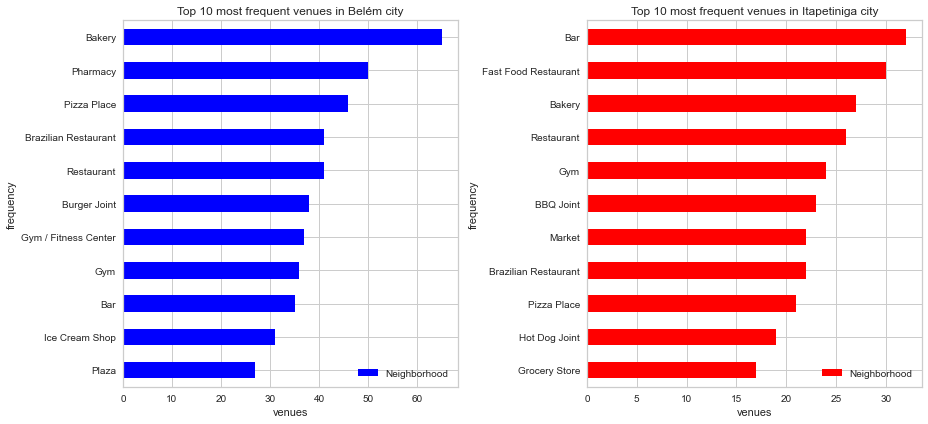

In [87]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#subplot1
top_10_belem_venues.plot(kind='barh',color='blue', figsize=(13,6),ax=ax0)
ax0.invert_yaxis()
ax0.set_title('Top 10 most frequent venues in Belém city')
ax0.set_xlabel('venues')
ax0.set_ylabel('frequency')
                         
#subplot 2
top_10_itapetininga_venues.plot(kind='barh',color ='red',figsize=(13,6),ax=ax1)
ax1.invert_yaxis()
ax1.set_title('Top 10 most frequent venues in Itapetiniga city')
ax1.set_xlabel('venues')
ax1.set_ylabel('frequency')
fig.tight_layout()

plt.show()

It's possible to see that 8 of 10 most frequent types of venues are in both charts. It means the similarity algorithm can perform with a little confidence. 

### Data agregation and normalization

Finally to perfom the Kmeans the Belém and Itapetininga data shall be agrupped in a sigle dataframe for the algorithm interation find the similarity between those cities. 

#### Veneus coordenates

In [94]:
bel_ita_venues=belem_venues.append(itapetininga_venues,ignore_index=True)
bel_ita_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Sorveteria - Vila De Mosqueiro,-1.142660,-48.455399,Ice Cream Shop
1,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Paris Pizza,-1.142946,-48.456628,Pizza Place
2,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Restô Barka Boa,-1.142882,-48.456452,Restaurant
3,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Extra Farma,-1.142971,-48.455950,Pharmacy
4,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,Academia Personal Fitness,-1.142958,-48.455605,Gymnastics Gym
...,...,...,...,...,...,...,...
1904,"Vila Visaltino Gomes, Itapetininga - SP, Brazil",-23.583060,-48.024875,Padaria e Confeitaria Paulista,-23.580039,-48.026456,Café
1905,"Vila Visaltino Gomes, Itapetininga - SP, Brazil",-23.583060,-48.024875,Aleixos,-23.579997,-48.026466,Fast Food Restaurant
1906,"Vila Visaltino Gomes, Itapetininga - SP, Brazil",-23.583060,-48.024875,Pizzaria Roma,-23.579977,-48.026474,Italian Restaurant
1907,"Vila dos Bandeirantes, Itapetininga - SP, 1820...",-23.600794,-48.068571,Hotel Colonial Flat,-23.602516,-48.071155,Hotel


#### neighborhoods coordenates

In [95]:
df_bel_ita=df_belem.append(df_itapetininga,ignore_index=True)
df_bel_ita

,Neighborhood,Latitude,Longitude
0,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427
1,"Água Boa (Outeiro), Belém - PA, 66833, Brazil",-1.340987,-48.460299
2,"Águas Lindas, Belém - PA, Brazil",-1.405529,-48.395076
3,"Águas Negras (Icoaraci), Belém - PA, 66820-180...",-1.303088,-48.453916
4,"Agulha (Icoaraci), Belém - PA, 66811-033, Brazil",-1.307735,-48.468183
...,...,...,...
170,"Vila Sao Gonçalo, Itapetininga - SP, Brazil",-23.627341,-48.051832
171,"Vila Sao Jose, Itapetininga - SP, 18205, Brazil",-23.601907,-48.046254
172,"Vila Sao Pedro, Itapetininga - SP, 18201, Brazil",-23.580489,-48.036338
173,"Vila Visaltino Gomes, Itapetininga - SP, Brazil",-23.583060,-48.024875


After the agregation the data is randomized to avoid bias.

In [96]:
#Randomize the data to avoid bias
bel_ita_venues=bel_ita_venues.sample(frac=1).reset_index(drop=True)

Kmeans algorthm only performs a numerical inputs so data shall be **one-hot encoded**. It is possible to see that 238 columns are created and results of each column are equal 0 for not contain the venues type in neiborhood or 1 if contain the venues type.

In [97]:
# one hot encoding
bel_ita_onehot = pd.get_dummies(bel_ita_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
bel_ita_onehot['Neighborhood'] = bel_ita_venues['Neighborhood'] 

# move neighbourhood column to the first column
fixed_columns = [bel_ita_onehot.columns[-1]] + list(bel_ita_onehot.columns[:-1])
bel_ita_onehot = bel_ita_onehot[fixed_columns]
bel_ita_onehot

,Neighborhood,Acai House,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,...,Video Game Store,Video Store,Volleyball Court,Water Park,Waterfront,Wine Shop,Wings Joint,Women's Store,Zoo,Zoo Exhibit
0,"Jardim das Rosas, Itapetininga - SP, 18210, Br...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Parque Sao Bento, Itapetininga - SP, Brazil",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Vila Rosa, Itapetininga - SP, 18203, Brazil",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Vila Rocha, Itapetininga - SP, 18201, Brazil",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Vila Camarão, Itapetininga - SP, Brazil",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,"Curió Utinga, Belém - PA, Brazil",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1905,"Vila Grace, Itapetininga - SP, 18201, Brazil",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1906,"Jardim Paulista, Itapetininga - SP, Brazil",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1907,"Águas Lindas, Belém - PA, Brazil",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finnaly the data is **normalized** using a mean of those venues to improve the performance of the algorithm interations reducing de distance between lower and higher values and giving more scalability to the data.

In [98]:
#Data normalization
bel_ita_grouped = bel_ita_onehot.groupby('Neighborhood').mean().reset_index()
bel_ita_transformed= bel_ita_grouped.drop('Neighborhood',axis=1)
bel_ita_transformed

,Acai House,Accessories Store,Airport,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Volleyball Court,Water Park,Waterfront,Wine Shop,Wings Joint,Women's Store,Zoo,Zoo Exhibit
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.011111,0.0,0.011111,...,0.000000,0.011111,0.0,0.00,0.0,0.0,0.0,0.011111,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.500000,...,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0
153,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.033333,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0
154,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0
155,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0


Now the data is ready to be performed into the Kmeans alogrithm.

## Methodology <a name="methodology"></a>

The methodology applied in this study was the **Cross Industry Standard Process for Data Mining** (CRISP DM) see image below.

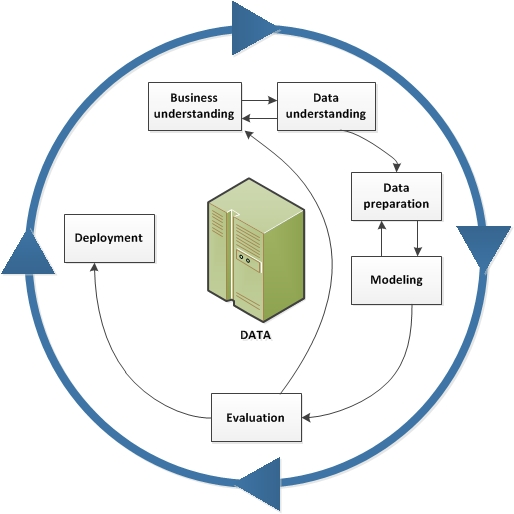

In [99]:
Image("https://www.ibm.com/support/knowledgecenter/SS3RA7_sub/modeler_crispdm_ddita/clementine/images/crisp_process.jpg")

First step is the **business understanding**, like discussed preaviously a car dearlership wants to expand their business unit to another city interstate and the local choose needs to be very similiar and with low cost. Were offers 12 lots with diferents locations and prices.

Second step is **Data understanding**, The data required to compare the similarity is the name and coordenates of neighborhoods in each cities, the data of venues in radio of 500 meters from each neghborhood, and the locations, and to compair the prices of lots a table contains the coordenates and the prizes.

Third step is **Data preparation**, All data scraped are transformed into a DataFrame, The google api set the neighborhoods coordenates and the Foursquare API extract the venues information. The Venues types are one-hot encoded, and trasformed by mean to be perfomed into Kmeans Clustering Model.

Four step is the **modeling**, The model used to perform the data is the Kmeans cluster algorithm, that will separate the neighborhoods into a clusters. The Belem dealership neighborhood cluster 

Five step is **Evaluation**, Kmeans is an **unsupervised learning algorithm** it means there are no metric to enssure the perfomance but it is possible define the best value of K that helps the model perform better. To do that a Elbow method is used and the eclidian distance calculated, the ideia is find a point (Value of K) thats the cost funciton perform better.

All of **those 5 steps are ciclicals** and shall **feedback** each other.

Six step is **Deployment**, Finnaly the results shall show the solution of the problem and explained into the bussiness problem. In this case the best lot that shall be buyed (most simmilar and with cheapest price). 
After choose the right number of K and perform the model the lot's will be evaluated by cluster it remains and the cost. A heat map shall indicate the warm place to set a business and to choose the lots nearby.


## Analysis<a name="analysis"></a>

The elbow method is performed to choose the right value of K. In this case it converge better in 23.

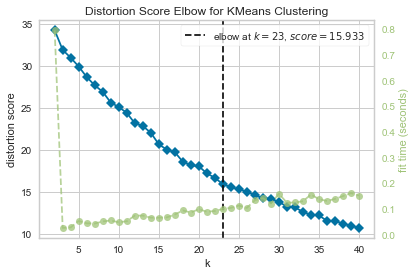

In [100]:
model = KElbowVisualizer(KMeans(), k=40)
model.fit(bel_ita_transformed)
model.show()

### Kmeans

A Kmeans algorithm is perform to cluster the data into 23 diferent clusters. Its possible to se the cluster labels generetated below:

In [155]:
kclusters = 23
bel_ita_grouped_clustering = bel_ita_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=2).fit(bel_ita_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:] 

array([11,  5,  6,  6, 11,  1,  1, 11, 11, 11, 11, 11,  6, 19, 11,  6, 11,
        0, 11, 11,  1,  6, 20,  6, 11, 11, 11, 15,  8, 11, 11, 21,  5, 18,
        4,  5,  7, 12, 11, 10,  6,  6, 11,  2,  6,  4,  4,  2,  5, 14, 13,
       11,  3,  6, 11, 19,  6, 11,  1, 11,  8, 11, 11,  6, 11, 11, 11,  6,
        8,  1, 11, 12, 11, 11, 11, 11, 16, 11, 19,  1, 11, 15, 11, 11, 11,
       10,  6, 11, 11, 11, 11, 11, 12, 11, 11,  6,  6, 14, 11, 15, 13,  9,
       11, 11,  5,  6,  5, 17,  6, 11, 10, 14,  6,  8,  5, 11, 11,  2, 22,
        2, 11, 11,  5, 11,  6, 11, 11,  2,  3,  2,  3,  5,  5, 11,  4, 11,
       14,  3,  9, 11, 11, 11,  5,  4,  8, 11,  5, 11, 11, 14, 11,  2,  3,
        6, 11,  6,  6])

### Most common venues

Now it's time to create a funcion to incorporate the top 10 venues types in Belem and Itapetininga agreggate DataFrame.

In [156]:
#Function to return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [157]:
df_bel_ita

,Neighborhood,Latitude,Longitude
0,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427
1,"Água Boa (Outeiro), Belém - PA, 66833, Brazil",-1.340987,-48.460299
2,"Águas Lindas, Belém - PA, Brazil",-1.405529,-48.395076
3,"Águas Negras (Icoaraci), Belém - PA, 66820-180...",-1.303088,-48.453916
4,"Agulha (Icoaraci), Belém - PA, 66811-033, Brazil",-1.307735,-48.468183
...,...,...,...
170,"Vila Sao Gonçalo, Itapetininga - SP, Brazil",-23.627341,-48.051832
171,"Vila Sao Jose, Itapetininga - SP, 18205, Brazil",-23.601907,-48.046254
172,"Vila Sao Pedro, Itapetininga - SP, 18201, Brazil",-23.580489,-48.036338
173,"Vila Visaltino Gomes, Itapetininga - SP, Brazil",-23.583060,-48.024875


In [158]:
# Choose Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = bel_ita_grouped['Neighborhood']

for ind in np.arange(bel_ita_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bel_ita_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bel_ita_merged = df_bel_ita
bel_ita_merged.rename(columns={'neighborhood': 'Neighborhood'}, inplace = True)
bel_ita_merged=bel_ita_merged.drop(6).reset_index(drop=True)
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
bel_ita_merged = bel_ita_merged.join(neighbourhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
bel_ita_merged.head(10)# check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,11.0,Gymnastics Gym,Soccer Field,Furniture / Home Store,Pedestrian Plaza,Bakery,Ice Cream Shop,Restaurant,Pharmacy,Sandwich Place,Pizza Place
1,"Água Boa (Outeiro), Belém - PA, 66833, Brazil",-1.340987,-48.460299,11.0,Food Truck,Bakery,Gym / Fitness Center,Convenience Store,Restaurant,Plaza,Pizza Place,Diner,Brazilian Restaurant,Market
2,"Águas Lindas, Belém - PA, Brazil",-1.405529,-48.395076,6.0,Harbor / Marina,Sports Club,Gym,Snack Place,Bakery,Zoo Exhibit,Electronics Store,Event Space,Fair,Farmers Market
3,"Águas Negras (Icoaraci), Belém - PA, 66820-180...",-1.303088,-48.453916,6.0,Food Truck,Bookstore,Motel,Snack Place,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop
4,"Agulha (Icoaraci), Belém - PA, 66811-033, Brazil",-1.307735,-48.468183,5.0,Market,Pizza Place,Bakery,Gym,Soccer Stadium,Pet Store,Pharmacy,Pastelaria,Convenience Store,Farmers Market
5,"Arirambá, Belém - PA, Brazil",-1.120125,-48.429282,6.0,Diner,Water Park,Scenic Lookout,Beach,Zoo Exhibit,Fast Food Restaurant,Event Space,Fair,Farmers Market,Fish & Chips Shop
6,"Barreiro, Belém - PA, Brazil",-1.413749,-48.484351,6.0,Gym,Stationery Store,Burger Joint,Auto Garage,Dessert Shop,Steakhouse,Bakery,Food,Flower Shop,Fish Market
7,"Batista Campos, Belém - PA, Brazil",-1.461139,-48.489843,11.0,Pharmacy,Brazilian Restaurant,Gym,BBQ Joint,Bar,Gym / Fitness Center,Restaurant,Fast Food Restaurant,Bakery,Tea Room
8,"Bengui, Belém - PA, Brazil",-1.375259,-48.455282,1.0,Bakery,Burger Joint,Pizza Place,Athletics & Sports,Zoo Exhibit,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market
9,"Bonfim, Belém - PA, Brazil",-1.109501,-48.397622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualization the Clusters In map

#### Belem Clusters

In [242]:
bel_ita_merged.dropna(inplace=True)
bel_ita_merged[['Cluster Labels']]=bel_ita_merged[['Cluster Labels']].astype('int')

# create map

map_clusters_belem = folium.Map(location=[-1.3030878,-48.4539157], zoom_start=11) #I choose Regent Park and Harbourfront from Downtown bel_ita for start point of visualization

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bel_ita_merged['Latitude'], bel_ita_merged['Longitude'], bel_ita_merged['Neighborhood'], bel_ita_merged['Cluster Labels']):
    label = folium.Popup(str(unidecode(poi)) + ' Cluster ' + str(cluster) + str(lat) + str(lon), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_belem)

#Dealership marker
folium.Marker([-1.4430904844245442, -48.48729129488024],
             popup='Dealership, Umarizal neighborhood',
             ).add_to(map_clusters_belem)
    
map_clusters_belem

This map shows how Belem city is segregated, Cluster 11(green) are neighborhoods more economically active: Centers, Turisctic places and so on. Cluster 6 (blue) are more poor neighborhoods and the other clusters are more specific and needs a better analisys. The Dealership Neborhood is Umarizal and it is in cluster 11. Next step is analyze Itapetininga clusters.

### Itapetininga Clusters

In [160]:
bel_ita_merged.dropna(inplace=True)
bel_ita_merged[['Cluster Labels']]=bel_ita_merged[['Cluster Labels']].astype('int')

# create map

map_clusters_itapetinga = folium.Map(location=[-23.584552,-48.043155], zoom_start=14) #I choose Regent Park and Harbourfront from Downtown bel_ita for start point of visualization

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bel_ita_merged['Latitude'], bel_ita_merged['Longitude'], bel_ita_merged['Neighborhood'], bel_ita_merged['Cluster Labels']):
    label = folium.Popup(str(unidecode(poi)) + ' Cluster ' + str(cluster) + str(lat) + str(lon), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_itapetinga )
    
#lot markers
for l_lat, l_lng, lot in zip(lot_location['Latitude'], lot_location['Longitude'], lot_location['Lotnames']):
    label = '{}, {}, {}'.format(lot,l_lat,l_lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [l_lat, l_lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#39cc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters_itapetinga)  
    
map_clusters_itapetinga 

How expected, the neighborhoods in cluster 11 of Itapetininga are centrals and probably economically actives. There area lots avaiable in this are. To choose the best a better vizualization is required. So a heat map is performed to better analize and vizualize where are the heat of cluster 11.

### Visualization the Clusters In Tables and Heat Map

#### Cluster Concessionária

To create a heat map the only the itapetininga cluster 11 data is required so it is filtered. 

In [178]:
cluster_dealership=bel_ita_merged[bel_ita_merged['Cluster Labels']==11].reset_index(drop=True)
Itapetininga_cluster_dealership=cluster_dealership[cluster_dealership['Latitude']<-2]
Itapetininga_cluster_dealership

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Aeroporto, Belém - PA, Brazil",-1.141777,-48.455427,11,Gymnastics Gym,Soccer Field,Furniture / Home Store,Pedestrian Plaza,Bakery,Ice Cream Shop,Restaurant,Pharmacy,Sandwich Place,Pizza Place
1,"Água Boa (Outeiro), Belém - PA, 66833, Brazil",-1.340987,-48.460299,11,Food Truck,Bakery,Gym / Fitness Center,Convenience Store,Restaurant,Plaza,Pizza Place,Diner,Brazilian Restaurant,Market
2,"Batista Campos, Belém - PA, Brazil",-1.461139,-48.489843,11,Pharmacy,Brazilian Restaurant,Gym,BBQ Joint,Bar,Gym / Fitness Center,Restaurant,Fast Food Restaurant,Bakery,Tea Room
3,"Brasília (Outeiro), Belém - PA, 66845-270, Brazil",-1.274630,-48.475618,11,Snack Place,Ice Cream Shop,Stadium,Boat or Ferry,Bus Station,Auto Garage,Pet Store,Fair,Farmers Market,Fish & Chips Shop
4,"Cabanagem, Belém - PA, Brazil",-1.368000,-48.432515,11,Clothing Store,Food Truck,Bar,Market,Electronics Store,Roof Deck,BBQ Joint,Pharmacy,Gym / Fitness Center,Zoo Exhibit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,"Vila Recreio, Itapetininga - SP, Brazil",-23.574727,-48.009699,11,Trail,Coffee Shop,Theme Park Ride / Attraction,Donut Shop,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop
61,"Vila Rio Branco, Itapetininga - SP, Brazil",-23.590288,-48.064231,11,Brazilian Restaurant,Swiss Restaurant,Bakery,Hot Dog Joint,Restaurant,BBQ Joint,Churrascaria,Shop & Service,Gym / Fitness Center,Pharmacy
62,"Vila Rosa, Itapetininga - SP, 18203, Brazil",-23.592428,-48.045944,11,Restaurant,Department Store,Bakery,Health & Beauty Service,Seafood Restaurant,Ice Cream Shop,Supermarket,Pizza Place,Japanese Restaurant,Juice Bar
63,"Vila Serafim, Itapetininga - SP, Brazil",-23.600880,-48.042225,11,BBQ Joint,Public Art,Clothing Store,Donut Shop,Food Court,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop


#### Heat-Map Itapetininga

In [233]:
itapetininga_cluster_latlon=[]
map_itapetininga = folium.Map(location=(-23.584552,-48.043155), zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(map_itapetininga) #cartodbpositron cartodbdark_matter

for lat,lon in zip(Itapetininga_cluster_dealership['Latitude'],Itapetininga_cluster_dealership['Longitude']):
    itapetininga_cluster_latlon.append([lat,lon])
    HeatMap(itapetininga_cluster_latlon).add_to(map_itapetininga)

for l_lat, l_lng, lot in zip(lot_location['Latitude'], lot_location['Longitude'], lot_location['Lotnames']):
    label = '{}, {}, {}'.format(lot,l_lat,l_lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [l_lat, l_lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#39cc31',
        fill_opacity=0.7,
        parse_html=False).add_to(map_itapetininga)
map_itapetininga

Finally the heat map indicates the lots between 1 to 5 shall be discarted and the lots between 6 to 12 are hot because they are in cluster 11. How warm the data is more neigborhoods of cluster 11 are nearby.

In [224]:
cluster_lots=lot_location[5:]
cluster_lots.set_index('Lotnames',inplace=True)
cluster_lots['price/area']=cluster_lots['price']/cluster_lots['area']
cluster_lots.sort_values(by=['price/area'])

<ipython-input-224-304164dc692a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_lots['price/area']=cluster_lots['price']/cluster_lots['area']


,Latitude,Longitude,price,area,price/area
Lotnames,,,,,
lot 11,-23.577770,-48.025248,6000,733,8.185539
lot 10,-23.578440,-48.026988,8000,900,8.888889
lot 9,-23.582544,-48.035506,5000,425,11.764706
lot 8,-23.586283,-48.034049,15000,1024,14.648438
lot 6,-23.584074,-48.041323,6000,364,16.483516
lot 7,-23.585158,-48.035727,7000,388,18.041237
lot 12,-23.579242,-48.029597,350000,4038,86.676573


In [231]:
map_itapetininga_best = folium.Map(location=(-23.584552,-48.043155), zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(map_itapetininga_best)

#Dealership marker
folium.Marker([-23.577770,-48.025248],
             popup='Best-Choice, Lot 11, Jardim Paulista, Itapetininga-SP',
             ).add_to(map_itapetininga_best)
map_itapetininga_best

## Results and Discussion<a name="results"></a>

The top 10 venues types in both cities were putted togheter in a horizontal bar chart, it is possible to see that 7 in 10 are present in those cities with highly frequency. So it is possible to see a similarity between those cities. This 7 venues types are: Berkery, Pizza place, Brazilian Restaurant, Restaurant, Burguer Joint, Gym and Bar.

The elbow method find 24 diferents clusters into DataFrame and Kmeans perfom those clustering. Like discussed before, the two main clusters of Belém city is Cluster 11 that represents central areas and or comercialy active. And cluster 6 that represents poor naighborhoods. As expected the belem dealerships neighborhood are located into cluster 11.

Itapetininga city is more pooverizade so it's normal to see more diferents clusters in this city. The lots were ploted into the itapetininga cluster map and as expected cluster 11 were sittued into a center location. 7 of 12 lots are nearby to the clusters. So to a better analisys was performed a heat map of those cluster 11 neigborhoods. those 7 lots were confirmed to be the beast place to set a filial because they are too close of warm area, in other words they are very similiar in terms of local infrastucture than the other lots.

Finnaly a simple analysis of cost/area shows lot 11 have the higher potential to be choosed. Just R$8.19/m2 per month can easily be paid and with a garantee that business team will have a better adaptation to the lot 11 location. There are similiar places nearby: Restaurants, Barkeries, Gyms and even a bars for after work confraternization. 

### Conclusion<a name="conclusion"></a>

This project was aimmed to suggest a good place to set a car dealership filial in Itapetininga city considering the location of headquarter in Belem city. Based on a similarity between neighborhoods also called **battle of neighborhoods** those two cities was confronted togheter and Kmeans algorithm custered those neighborhoods sucesfully.

As expected the centrals and economically actives neighborhoods of the lots in Itapetininga are better and similiars to the headquarter located in Belem city. The lot 11 also have the best cost/benefict. Therefore it is a lot with higher potential to get a bussiness team adaptation and satisfaction. Addictionaly similar places can atract similar costumers and has a economic potential too.

Finally this project goal was reached and a good location was sugested with a certain of confiability, howover this project can't inssure that lot 11 is the best location, because there are a lot of joint analisys that needs to be performed togheter such as: Return Over Investiment (ROI), Operational cost, Logistic, the headquarter's political buying and so on. For future studies it is intersting to do those joint analisys expectilly the ROI beacuse it is the core of business investiment. 
